In [1]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [2]:
line[3:20]

'0.0000000e+00\t   '

In [3]:
import numpy as np
tooth3_3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        tooth3_3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

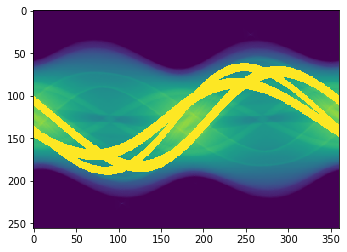

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(tooth3_3_img)
plt.colorbar

In [5]:
tooth3_3_img.shape

(256, 360)

In [6]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
model = Sequential() # Sequeatial Model 
model.add(LSTM(640, input_shape=(1, 9))) # (timestep, feature) 
model.add(Dense(300)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 640)               1664000   
_________________________________________________________________
dense (Dense)                (None, 300)               192300    
Total params: 1,856,300
Trainable params: 1,856,300
Non-trainable params: 0
_________________________________________________________________


In [7]:
result_img = tooth3_3_img
window_size = 9
x_data = []
y_data = []
k = 0
for j in range(30):
    for i in range(256-window_size-1):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if result_img[i+1+window_size, j] == 300:
                if k == 0:
                    x_train_data = np.asarray(x_data)
                    y_train_data = np.asarray(y_data)
                    model.fit(x_train_data, y_train_data, epochs = 300, batch_size = 1)
                    k = k + 1
                    x_test_data = []
                    x_test_data.append([result_img[i:i+window_size,j]])
                    x_predict_data = np.asarray(x_test_data)
                    prediction = model.predict(x_predict_data)
                    result_img[i:i+1+window_size,j] = prediction[0,0]
                x_test_data = []
                x_test_data.append([result_img[i:i+window_size,j]])
                x_predict_data = np.asarray(x_test_data)
                prediction = model.predict(x_predict_data)
                result_img[i+1+window_size,j] = prediction[0,0]
            else:
                x_data.append([result_img[i:i+window_size,j]])
                y_data.append(result_img[i+1+window_size,j])

Epoch 1/300
64/64 [==============================] - 1s 14ms/step - loss: 14366.1572
Epoch 2/300
64/64 [==============================] - 1s 16ms/step - loss: 10571.6533
Epoch 3/300
64/64 [==============================] - 1s 16ms/step - loss: 7564.5869
Epoch 4/300
64/64 [==============================] - 1s 15ms/step - loss: 5448.5083
Epoch 5/300
64/64 [==============================] - 1s 16ms/step - loss: 3964.9375
Epoch 6/300
64/64 [==============================] - 1s 15ms/step - loss: 2894.1997
Epoch 7/300
64/64 [==============================] - 1s 15ms/step - loss: 2124.9526
Epoch 8/300
64/64 [==============================] - 1s 16ms/step - loss: 1682.8401- ETA: 0s - loss: 1405.81 - ETA: 0s - loss: 1402.
Epoch 9/300
64/64 [==============================] - 1s 16ms/step - loss: 1234.4871
Epoch 10/300
64/64 [==============================] - 1s 16ms/step - loss: 944.5776
Epoch 11/300
64/64 [==============================] - 1s 16ms/step - loss: 750.7341
Epoch 12/300
64/64 [=====

64/64 [==============================] - 1s 16ms/step - loss: 100.6737
Epoch 97/300
64/64 [==============================] - 1s 17ms/step - loss: 117.6785
Epoch 98/300
64/64 [==============================] - 1s 16ms/step - loss: 108.8286
Epoch 99/300
64/64 [==============================] - 1s 17ms/step - loss: 108.8763
Epoch 100/300
64/64 [==============================] - 1s 15ms/step - loss: 123.0844
Epoch 101/300
64/64 [==============================] - 1s 16ms/step - loss: 115.7195
Epoch 102/300
64/64 [==============================] - 1s 16ms/step - loss: 101.9343
Epoch 103/300
64/64 [==============================] - 1s 15ms/step - loss: 108.0382
Epoch 104/300
64/64 [==============================] - 1s 16ms/step - loss: 124.3054
Epoch 105/300
64/64 [==============================] - 1s 16ms/step - loss: 119.2583
Epoch 106/300
64/64 [==============================] - 1s 16ms/step - loss: 134.9220
Epoch 107/300
64/64 [==============================] - 1s 16ms/step - loss: 136.90

64/64 [==============================] - 1s 8ms/step - loss: 162.6653
Epoch 192/300
64/64 [==============================] - 1s 9ms/step - loss: 148.4776
Epoch 193/300
64/64 [==============================] - 1s 9ms/step - loss: 133.1570
Epoch 194/300
64/64 [==============================] - 1s 9ms/step - loss: 172.6095
Epoch 195/300
64/64 [==============================] - 1s 9ms/step - loss: 171.2520
Epoch 196/300
64/64 [==============================] - 1s 9ms/step - loss: 160.4216
Epoch 197/300
64/64 [==============================] - 1s 9ms/step - loss: 142.6190
Epoch 198/300
64/64 [==============================] - 1s 9ms/step - loss: 134.4241
Epoch 199/300
64/64 [==============================] - 1s 9ms/step - loss: 144.0190
Epoch 200/300
64/64 [==============================] - 1s 9ms/step - loss: 145.9653
Epoch 201/300
64/64 [==============================] - 1s 9ms/step - loss: 138.0040
Epoch 202/300
64/64 [==============================] - 1s 9ms/step - loss: 173.7583
Epoch 

Epoch 288/300
64/64 [==============================] - 1s 9ms/step - loss: 126.2748
Epoch 289/300
64/64 [==============================] - 1s 9ms/step - loss: 127.3160
Epoch 290/300
64/64 [==============================] - 1s 10ms/step - loss: 123.1424
Epoch 291/300
64/64 [==============================] - 1s 9ms/step - loss: 109.0569
Epoch 292/300
64/64 [==============================] - 1s 9ms/step - loss: 118.2525
Epoch 293/300
64/64 [==============================] - 1s 10ms/step - loss: 114.8367
Epoch 294/300
64/64 [==============================] - 1s 9ms/step - loss: 110.2836
Epoch 295/300
64/64 [==============================] - 1s 9ms/step - loss: 107.5428
Epoch 296/300
64/64 [==============================] - 1s 9ms/step - loss: 116.5091
Epoch 297/300
64/64 [==============================] - 1s 10ms/step - loss: 127.3816
Epoch 298/300
64/64 [==============================] - 1s 9ms/step - loss: 108.2047
Epoch 299/300
64/64 [==============================] - 1s 9ms/step - loss

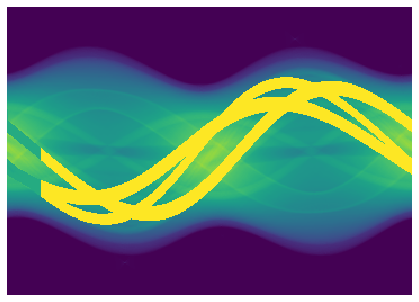

In [10]:
plt.imshow(result_img[:,:])
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/RNN3.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [57]:
# np.savetxt('images/tooth3_training_txt.txt', result_img)